# The potential for peer-to-peer rental of hevy machinery in Norway

In this project we where asked to 1) pick a data set and 2) pose at least three questions related to business or real-world applications of how the data could be used. 

The project will follow the CRISP-DM (Cross Industry Process for Data Mining), that outlines the following steps; 

1. [Business Understanding](#first-bullet) 
2. [Data Understanding](#second-bullet)
3. [Prepare Data](#third-bullet)
4. [Data Modelling](#fourth-bullet)
5. [Evaluate the Results](#fifth-bullet) 
6. [Deploy](#sixth-bullet)

I have also structured this notebook in the respective steps. 

## Business Understanding <a class="anchor" id="first-bullet"></a>

Through working with optimizing the utilization of resources in the construction industry, I have learned through market reports that heavy machiery remain unused 70% of the time. The startup I have co-founded, Fremby, aims to improve this through better tools for optimizing the resource utilization. However, as the activity is variable for each machine owner, so is also the need for capacity. Fremby therefore wants to enable peer-to-peer rental of heavy machinery, to enable machine owners to reduce the impact of idle machinery. Better yet, could they actually earn some money on renting the machines out to others? And maybe rely more on renting themselves instead of owning? There are many aspects to investigate around this, but we wanted to start by investigate the market and potential for peer-to-peer rental in Norway. More specifically, we wanted to know; 

1) How many machine owners are there in Norway, and how many machines do they typically have?  

2) How are the market disributed over the country? 

3) What is the market potential for a machine owner, to rent out the machine while not used?

To answer these questions we have gathered data from internal sources and from public data sources. 

## Data Understanding <a class="anchor" id="second-bullet"></a>

First we import the modules we need and read in the data set we have gathered on machine owners in Norway. *Note: We have annonymized the data, so some preparations have been done*

Each row in the data set is one attributes for one company. 

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/construction_marketinformation_v1.csv')
df.head()

,region,postcode,place,county,Gravemaskin - belter,Lastebiler,Hjullastere,Traktorer,Maskinhengere,Gravemaskin - hjul,...,Containerbiler,Bulldosere,Veghøvler,Andre,Maskiner Totalt,Registrering år,Næring,Antall ansatte,Omsetning EUR,Name
0,Region Øst,2067,Jessheim,Akershus,5,4,2,0,1,0,...,1,1,0,2,19,"=""22.01.2011",Grunnarbeid (43120),44.0,10435996.0,Company 1
1,Region Nord,9540,Talvik,Finnmark,0,0,0,0,0,0,...,0,0,0,0,0,"=""31.03.2009",Detaljhandel med drivstoff til motorvogner (47...,2.0,4127092.0,Company 2
2,Seksjon Ressurs og miljø,2317,Hamar,Hedmark,0,0,2,0,0,2,...,1,0,0,7,12,"=""10.02.2004",Innsamling av ikke-farlig avfall (38110),45.0,15175605.0,Company 3
3,Region Vest,6963,Dale i Sunnfjord,Sogn og Fjordane,4,0,0,0,0,0,...,0,0,0,0,6,"=""18.04.2013",Annen spesialisert bygge- og anleggsvirksomhet...,1.0,446362.0,Company 4
4,Region Øst,2387,Brumunddal,Hedmark,2,0,0,1,1,0,...,0,0,0,0,4,"=""12.02.2005",Grunnarbeid (43120),5.0,928763.0,Company 5


Since this data is in Norwegian we first translate the headings to improve readability. 

In [113]:
df.columns

Index(['region', 'postcode', 'place', 'county', 'Gravemaskin - belter',
       'Lastebiler', 'Hjullastere', 'Traktorer', 'Maskinhengere',
       'Gravemaskin - hjul', 'Minimaskiner < 5tonn', 'Dumpere', 'Borevogner',
       'Knuseverk', 'Trekkvogner', 'Kompressorer', 'Containerbiler',
       'Bulldosere', 'Veghøvler', 'Andre', 'Maskiner Totalt',
       'Registrering år', 'Næring', 'Antall ansatte', 'Omsetning EUR', 'Name'],
      dtype='object')

In [114]:
### Translate all column names to english
newnames = ['Region', 'Postcode', 'Place', 'County',
       'Excavators - belts', 'Trucks', 'Wheel Loaders', 'Tractors',
       'Machine Trailer', 'Excavators - Wheels', 'Mini-Machines < 5 Tonnes',
       'Dumpers', 'Drill Vagons', 'Crushing Mills', 'Tractor/Trailer Units', 'Compressors',
       'Container Trucs', 'Dozers', 'Graders', 'Other', 'Machines Total',
       'Established', 'Industry Category', 'Employees', 'Revenue EUR', 'Name']
df = df.set_axis(newnames,axis=1,inplace=False)
df.columns

Index(['Region', 'Postcode', 'Place', 'County', 'Excavators - belts', 'Trucks',
       'Wheel Loaders', 'Tractors', 'Machine Trailer', 'Excavators - Wheels',
       'Mini-Machines < 5 Tonnes', 'Dumpers', 'Drill Vagons', 'Crushing Mills',
       'Tractor/Trailer Units', 'Compressors', 'Container Trucs', 'Dozers',
       'Graders', 'Other', 'Machines Total', 'Established',
       'Industry Category', 'Employees', 'Revenue EUR', 'Name'],
      dtype='object')

As the column names show there is data on total machines and also for most common types of machines. In addition to this there are geographical information, industry Category and  as well as number of employees and annual revenue in euros. Below we do some initial descriptive analysis of the data set. 

In [115]:
# Check how many columns (features) and rows (companies) are in the data set
num_rows = df.shape[0]
num_cols = df.shape[1]
print("There are {} number of columns and {} number of rows in the data sett".format(num_cols,num_rows))

There are 26 number of columns and 2004 number of rows in the data sett


In [116]:
# Generate some descriptive statistics of the data set, excluding NaN values
# Start with the nummerical values
df.describe(include=np.number)

,Postcode,Excavators - belts,Trucks,Wheel Loaders,Tractors,Machine Trailer,Excavators - Wheels,Mini-Machines < 5 Tonnes,Dumpers,Drill Vagons,Crushing Mills,Tractor/Trailer Units,Compressors,Container Trucs,Dozers,Graders,Other,Machines Total,Employees,Revenue EUR
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.00000,2004.000000,2004.000000,1380.000000,1.331000e+03
mean,5024.913673,3.944611,2.150200,1.463074,0.858782,0.668663,0.596806,0.599301,0.695609,0.466567,0.479541,0.317365,0.289421,0.266966,0.135230,0.15020,2.579341,15.661677,21.959420,5.527847e+06
std,2350.422980,5.467411,8.329635,5.389672,1.210504,1.029760,1.251304,1.124155,1.827608,1.369878,1.403612,1.208671,1.249690,1.758820,0.588775,1.91817,16.440340,35.686846,60.917958,2.745250e+07
min,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.610000e+03
25%,3174.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,4.000000,6.206275e+05
50%,4634.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,10.000000,10.000000,1.602735e+06
75%,6899.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,18.000000,22.000000,4.249124e+06
max,9991.000000,98.000000,320.000000,214.000000,12.000000,21.000000,26.000000,13.000000,32.000000,31.000000,35.000000,30.000000,37.000000,61.000000,15.000000,84.00000,568.000000,1321.000000,1605.000000,8.232031e+08


Postal code might be better represented as a categorical variable, as it gives no meaning analysing it as a nummerical variable. Looking at the counts of the data above, most of the columns presented do not have missing values. Only **"Employees"** and **"Revenue EUR"** does show less than 2004, which is the same count as the number of rows in the data set. The average Revenue is 5 527 847 EUR (5,23 MEUR) which is quite high as I have heard that the market consists of many smaller companies. We also see that the average number of machines per company in the data set is 15.7, which indicates that the companies in the data set has some potential for sharing machine resources between eachother. 

However, this is only the nummerical columns. Lets look at the other columns. 

In [117]:
# Describe non-nummeric columns
df.describe(exclude=np.number)

,Region,Place,County,Established,Industry Category,Name
count,2004,2004,2004,1490,1490,2004
unique,7,834,20,925,69,2004
top,Region Sørøst,Alta,Hordaland,"=""19.02.1995",Grunnarbeid (43120),Company 534
freq,410,30,184,228,877,1


Here we see that Established and Industry Category has some missing values, but that the other have no missing values. We also see that established seem to have a formatting error, as =" is appended to the date. Notice also that there are 20 unique counties in this data set. That is before the new partitionning that is actually 18, as "Sør-Trøndelag" and "Nord-Trøndelag" has been merged to "Trøndelag", and also that "Svalbard" is added to "Troms". That we'll sort out in the Data Preparation section below. 

Below we calculate and confirm the columns with no missing values, and show the percentage missing values of all columns

In [118]:
# no missing values
no_nulls = set(df.columns[df.isnull().mean()==0])
print("Columns with no missing values:",no_nulls)

# % missing values per column
df.isnull().sum()/df.shape[0]*100

Columns with no missing values: {'Wheel Loaders', 'Crushing Mills', 'Dozers', 'Machines Total', 'Postcode', 'Excavators - belts', 'Excavators - Wheels', 'Mini-Machines < 5 Tonnes', 'Tractors', 'Compressors', 'Other', 'Place', 'Dumpers', 'County', 'Graders', 'Region', 'Name', 'Machine Trailer', 'Drill Vagons', 'Tractor/Trailer Units', 'Container Trucs', 'Trucks'}


Region                       0.000000
Postcode                     0.000000
Place                        0.000000
County                       0.000000
Excavators - belts           0.000000
Trucks                       0.000000
Wheel Loaders                0.000000
Tractors                     0.000000
Machine Trailer              0.000000
Excavators - Wheels          0.000000
Mini-Machines < 5 Tonnes     0.000000
Dumpers                      0.000000
Drill Vagons                 0.000000
Crushing Mills               0.000000
Tractor/Trailer Units        0.000000
Compressors                  0.000000
Container Trucs              0.000000
Dozers                       0.000000
Graders                      0.000000
Other                        0.000000
Machines Total               0.000000
Established                 25.648703
Industry Category           25.648703
Employees                   31.137725
Revenue EUR                 33.582834
Name                         0.000000
dtype: float

Fortunately the data set has no missing values for the columns listing geographical information and information on the different machines. These attributes are the most important attributes for answering the business questions. However, Revenue EUR might be a parameter we want to use in order to have some measure of how significant the renting oportunity is compared to their current revenue. It has 33,5% missing values, which needs to be handled in the data preparation section in order to be used. 

Lets have a look at the distribution of the Revenues, remember the avarage revenue was 5,23 MEUR (5,23*1e6)

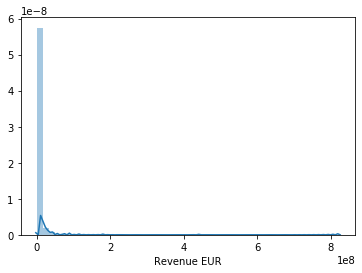

In [119]:
revenue = df["Revenue EUR"].dropna(axis = 0, how ='any') 
sns.distplot(revenue)

In [120]:
# Number of machine Owners with revenue below 50 MEUR (~10*mean)
df[df["Revenue EUR"]< 50e6].shape[0]

1318

As we see the distribution is very skewed with a long tale to the right and most machine owners having less than 50 MEUR in revenue. There are some big companies, and many small companies. 

As number of machines are a key measure to the business understanding, it is also interesting to see the disribution of number of machines owned per company. 

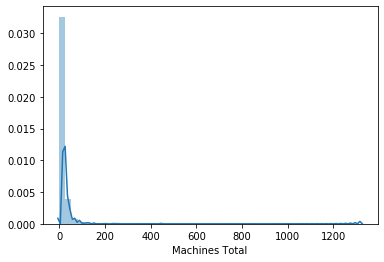

In [121]:
sns.distplot(df["Machines Total"])

In [122]:
# How many companies have no machines? 
df[df["Machines Total"]==0].shape[0]/df.shape[0]*100

6.686626746506986

In [123]:
# How many companies have less than 30 machines (~2*mean)
df[df["Machines Total"]<30].shape[0]/df.shape[0]*100

89.02195608782435

Also the number of machines are very shewed to the left. Where 6,7% of the companies have no machines and 89% have less than 30 Machines. 

We need some other data, e.g. rental prices to understand what the potential is for renting out machines for the companies. For this we have found some prices from the norwegian rental company Naboen and some internal studies with Fremby's customers. 

Naboen, and other rental companies, typcially rent out smaller machines than the ones owned by many of the customers. And looking at prices on naboen.no we see that prices mainly vary with the weight of the machines per type. E.g. a [5,5-6 Tonn CAT wheel loader](https://www.naboen.no/produkt/frontlaster-55-6t/) has the same price as a [5,5-6 Tonn Giant wheel loader](https://www.naboen.no/produkt/frontlaster-55-6t-4/) both at 2.841,00 NOK. 

We don't have any weight measure, other than the own category of "Mini-Machines < 5 Tonnes", so we need to use average prices per type of machines from the naboen source. 

In [124]:
# We store the average prices in a dictionary. First we instansiate a dictionary with 0 price for each type. 
machine_types_daily_rental_prices_eur = {'Excavators - belts':0, 'Trucks':0,
       'Wheel Loaders':0, 'Tractors':0, 'Machine Trailer':0, 'Excavators - Wheels':0,
       'Mini-Machines < 5 Tonnes':0, 'Dumpers':0, 'Drill Vagons':0, 'Crushing Mills':0,
       'Tractor/Trailer Units':0, 'Compressors':0, 'Container Trucs':0, 'Dozers':0,
       'Graders':0, 'Other':0}

## Below we find rental prices (NOK) and average them and convert to EUR for each category found. 

# check naboen for average rental price per machine type 
# Excavators rental price: https://www.naboen.no/produktkategori/anleggsmaskiner/gravemaskin-8-40t/ 
# Excavators belt : 3 * Hyundai/CAT 15T = 4.681,00kr, 15-17T = 5.796,00kr,Doosan 16-18T = 4.773,00
#                   3 * Hyundai/Doosan 20-25T = 6.705,00kr 
machine_types_daily_rental_prices_eur["Excavators - belts"] = ((3*4681 + 1*5796 + 1*4773 + 3*6705)/8)*0.099
# Excavators wheel: Doonsan DX140W-3 5.796,00 kr and Hyundai HW140 2pc bom 4.681,00 kr 
machine_types_daily_rental_prices_eur['Excavators - Wheels'] = ((1*5796 + 1*4681)/2)*0.099
# Wheel loaders: 6* JCB 409/5,5-6T kr 2.841,00, 14-15T 4.886,00
machine_types_daily_rental_prices_eur['Wheel Loaders'] = ((6*2841+1*4886)/7)*0.099 
# Mini machines < 5 T: 4* Giant V6004T kr 2.602,00, 2* Giant V4502T kr 2.477,00, Giant SK201D kr 1.639,00,
#                2* Giant D337T kr 2.330,00, Giant D204SK 1.478,00, D204W kr 1.478,00
machine_types_daily_rental_prices_eur['Mini-Machines < 5 Tonnes'] = ((4*2602+2*2477+1*1639+2*2330+2*1478)/11)*0.099
# Dumpers > 5T : MST-1500VD kr 5.245,00, Volvo A40G kr 10.007,00 
machine_types_daily_rental_prices_eur["Dumpers"] = ((5245+10007)/2)*0.099

## The following estimates are from discussion with industry professionals. 
# Crushing Mills / Knuseverk - quote example 200 000 NOK per month. 
machine_types_daily_rental_prices_eur['Crushing Mills'] = (200000/20)*0.099 # ref. industry collegue 
## the following are conservative guestimates per category done together with industry professionals. 
# Drill Vagons / Borevogner 
machine_types_daily_rental_prices_eur['Drill Vagons'] = 4500*0.099 # Guestimate
# Tractors / Traktorer 
machine_types_daily_rental_prices_eur['Tractors'] = 3000 * 0.099 # Guestimate
# Dozers /Buldozere
machine_types_daily_rental_prices_eur['Dozers'] = 4000*0.099 # Guestimate 
# Other 
machine_types_daily_rental_prices_eur['Other'] = 3000* 0.099 # Guestimate
# Graders / Veghøvler 
machine_types_daily_rental_prices_eur['Graders'] = 4000*0.099 # Guestimat 

## The other categories we didn't guess the rental price, but we'll agree we could use the average of the above
## categories to set a rental price for the Machines Total number for each company. 

# Current price dictionary in EUR 
machine_types_daily_rental_prices_eur


{'Excavators - belts': 553.496625,
 'Trucks': 0,
 'Wheel Loaders': 310.1811428571429,
 'Tractors': 297.0,
 'Machine Trailer': 0,
 'Excavators - Wheels': 518.6115,
 'Mini-Machines < 5 Tonnes': 221.55300000000003,
 'Dumpers': 754.974,
 'Drill Vagons': 445.5,
 'Crushing Mills': 990.0,
 'Tractor/Trailer Units': 0,
 'Compressors': 0,
 'Container Trucs': 0,
 'Dozers': 396.0,
 'Graders': 396.0,
 'Other': 297.0}

We assume that rental oportunity is limited to distances, and want to be able to view and segment rental oportunity in relation to where in Norway the machines and machine owners operate. For that we will use map data for norway. I found a geojson file of the norwegian counties from Erik Smistad. It has the new county partitonning (as mentioned above). 

In [125]:
# In order to read the geojson, we need to import geopandas. 
# the geojson handling is ref blog posts at https://www.eriksmistad.no
import geopandas as gpd
norway_counties = gpd.read_file("https://www.eriksmistad.no/upload/fylker.json")
norway_counties.head()

,navn,samiskforvaltningsomrade,oppdateringsdato,navnerom,datafangstdato,datauttaksdato,fylkesnummer,opphav,objtype,lokalid,versjonid,geometry
0,"[ { ""sprak"": ""nor"", ""navn"": ""Rogaland"", ""rekke...",False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,None,20180109110331,11,None,Fylke,173152,4.1,"POLYGON ((4.603688492717719 59.55816318361889,..."
1,"[ { ""sprak"": ""nor"", ""navn"": ""Finnmark"", ""rekke...",None,None,http://skjema.geonorge.no/SOSI/produktspesifik...,None,20180109110331,20,None,Fylke,173142,4.1,"POLYGON ((21.98361885127974 69.07288745234516,..."
2,"[ { ""sprak"": ""nor"", ""navn"": ""Troms"", ""rekkefol...",None,None,http://skjema.geonorge.no/SOSI/produktspesifik...,None,20180109110331,19,None,Fylke,173143,4.1,"POLYGON ((16.25435079984714 69.59670059340004,..."
3,"[ { ""sprak"": ""nor"", ""navn"": ""Møre og Romsdal"",...",False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,None,20180109110331,15,None,Fylke,173147,4.1,"POLYGON ((7.648093936572621 63.76816766381788,..."
4,"[ { ""sprak"": ""nor"", ""navn"": ""Hordaland"", ""rekk...",False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,None,20180109110331,12,None,Fylke,173151,4.1,"POLYGON ((4.184770721987087 60.83335259599808,..."


Here we see geometry for each county (fylke). Below we verify that this map has the new partition, of 18 instead of 20 counties. 

In [126]:
# Number of rows (counties) and columns (features)
norway_counties.shape

(18, 12)

The name (navn) column seems to be badly formatted, but contains the county name. We need to address that in the Data Preparation section.

In [127]:
norway_counties["navn"].head()

0    [ { "sprak": "nor", "navn": "Rogaland", "rekke...
1    [ { "sprak": "nor", "navn": "Finnmark", "rekke...
2    [ { "sprak": "nor", "navn": "Troms", "rekkefol...
3    [ { "sprak": "nor", "navn": "Møre og Romsdal",...
4    [ { "sprak": "nor", "navn": "Hordaland", "rekk...
Name: navn, dtype: object

## Data Preparation <a class="anchor" id="third-bullet"></a>

In this section we'll do some preparation to be able to use the data to answer the questions properly. We will first prepare each data set, then create a merged dataset that could be used with map data from norway_counties. 

These are the main steps we will take; 

**df to new_df**
1. Select only relevant columns for answering the questions (i.e. drop unused columns)
2. Update the data set to use new county distribution (i.e. going from 20 to 18 counties)
3. Sort out the missing values of the Revenue EUR column
4. Check and correct potential dtypes 
5. Create and add relevant columns to the data set
6. Use known rental prices to calculate and add an average daily and annual rental price in EUR to new_df. 
7. We will create a new "counties_df" by grouping the df after its columns. 

**norway_counties** (geojson)

8. fix county name column with corresponding naming as df
9. Add/merge in data from counties_df based on county group values. 


### Preparing the df data set

first we will filter out the relevant columns of the data set and store that in a new_df. 

In [128]:
new_df = df[['County', 'Excavators - belts', 'Trucks','Wheel Loaders', 'Tractors', 'Machine Trailer', 
             'Excavators - Wheels','Mini-Machines < 5 Tonnes', 'Dumpers', 'Drill Vagons', 'Crushing Mills',
             'Tractor/Trailer Units', 'Compressors', 'Container Trucs', 'Dozers','Graders', 'Other', 
             'Machines Total', 'Revenue EUR']]
new_df.head()

,County,Excavators - belts,Trucks,Wheel Loaders,Tractors,Machine Trailer,Excavators - Wheels,Mini-Machines < 5 Tonnes,Dumpers,Drill Vagons,Crushing Mills,Tractor/Trailer Units,Compressors,Container Trucs,Dozers,Graders,Other,Machines Total,Revenue EUR
0,Akershus,5,4,2,0,1,0,1,1,0,1,0,0,1,1,0,2,19,10435996.0
1,Finnmark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4127092.0
2,Hedmark,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,7,12,15175605.0
3,Sogn og Fjordane,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,6,446362.0
4,Hedmark,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4,928763.0


As this data set uses the previouse counties, we need to update new_df to use the new counties.

In [129]:
""" Function to update dataset to new county segmentation, where Sør-Trøndelag and Nord-Trøndelag is now joined as 
    Trøndelag, and Svalbard is part of Troms county
    
    parameter: (string) county 
    returns (string) new county 
    
    """
def change_row_name(x):
    if "Trøndelag" in x:
        return "Trøndelag"
    elif "Svalbard" in x:
        return "Troms"
    else:
        return x
    
# Update the Counties in the data set, to the new county segmetnation. 
new_df["County"] = new_df["County"].apply(change_row_name)
# Test to see the list of counties and counts of rows for each county 
new_df.County.value_counts() ## gives number of machine owners per county. 

/miniconda2/envs/dataSci/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Trøndelag           218
Hordaland           184
Buskerud            169
Vestfold            164
Møre og Romsdal     150
Telemark            127
Akershus            119
Rogaland            114
Sogn og Fjordane    104
Oppland             101
Nordland             96
Troms                87
Hedmark              87
Østfold              79
Finnmark             73
Vest-Agder           63
Aust-Agder           52
Oslo                 17
Name: County, dtype: int64

Now we have the data categorized after the new county names. Looking into the dtypes, we see that all values expept Revenue EUR has the right type. Revenue EUR is suppose to be in integer, but as it has NaN it is given as a float. Now lets first handle the missing values and then convert it to a integer. 

In [130]:
new_df.dtypes

County                       object
Excavators - belts            int64
Trucks                        int64
Wheel Loaders                 int64
Tractors                      int64
Machine Trailer               int64
Excavators - Wheels           int64
Mini-Machines < 5 Tonnes      int64
Dumpers                       int64
Drill Vagons                  int64
Crushing Mills                int64
Tractor/Trailer Units         int64
Compressors                   int64
Container Trucs               int64
Dozers                        int64
Graders                       int64
Other                         int64
Machines Total                int64
Revenue EUR                 float64
dtype: object

There are a few strategies to handle the missing revenue values, however dropping the respective rows are not an option as our questions are best addressed with the other columns that does not have missing values. We do want the Revenue EUR per company, as an indication of the size of the market the machine owners represent. Thus, we need to find a way to impute some values. 

For this we could impute with the mean, or we could do forward/backward fill. Doing forward and backward fill might be relevant if we could sort the list by a relevant measure from the other columns. Number of machines could be this, as some correlation between number of machine owned and revenue seems likely. We will try both and select the most conservative measure in terms of total revenue. 

In [131]:
#  Test Imputing with the mean
mean_imputed_df = new_df.fillna(new_df.mean())
mean_imputed_df["Revenue EUR"].sum()

11077804597.541698

In [132]:
# First sort new_df on number of machines from high to low
new_df = new_df.sort_values(by="Machines Total",ascending=False)
# then try backward fill 
backward_fill_df = new_df.bfill()
backward_fill_df["Revenue EUR"].sum()

11080874650.0

In [133]:
# then try forward fill 
forward_fill_df = new_df.ffill()
forward_fill_df["Revenue EUR"].sum()

10373872007.0

We clearly see that the forward fill method gives the lowest total sum of revenue, so that is the most concervative estimation of the missing values. Therefore, we use that so that as the method going forward. 

In [134]:
## Update new_df with filled missing revenue data
new_df = new_df.ffill()
# confirm no missing values and same size
print("There are {} missing values and size of new_df is {}".format(new_df.isna().sum().sum(),new_df.shape[0]))

There are 0 missing values and size of new_df is 2004


In [135]:
# Now lets change the dtype of Revenue EUR to Int64
new_df["Revenue EUR"] = new_df["Revenue EUR"].astype('int64')
# and see result
new_df.dtypes

County                      object
Excavators - belts           int64
Trucks                       int64
Wheel Loaders                int64
Tractors                     int64
Machine Trailer              int64
Excavators - Wheels          int64
Mini-Machines < 5 Tonnes     int64
Dumpers                      int64
Drill Vagons                 int64
Crushing Mills               int64
Tractor/Trailer Units        int64
Compressors                  int64
Container Trucs              int64
Dozers                       int64
Graders                      int64
Other                        int64
Machines Total               int64
Revenue EUR                  int64
dtype: object

Then we have all columns in proper types and we have sorted out both counties and revenue. Next we will create and add some new calculated columns to new_df that is relevant for answering the business questions. 

In [136]:
## Enable summation of each company per county, so add a column with 1 per row entry
new_df["Machine Owner"] = 1
print("Total number of machine owners are {}, and size of data set is {}".format(
    new_df["Machine Owner"].sum(),new_df.shape[0]))

Total number of machine owners are 2004, and size of data set is 2004


We want to add some information of rental prices to the data set. This is key for us to look into the potential for renting out peer-to-peer. 

We have prices for many categories of machines, and use that to create an average rental price for all machines. 

In [137]:
""" Code to calculate the average rental price based on the known prices per category"""
average_rental_price = 0 
# Counter to keep track of categories with prices
i = 0
# Loop through our list of rental prices per category. 
for key,value in machine_types_daily_rental_prices_eur.items():
    # Only consider values that we have set the price of. 0 means we didn't give a value above. 
    if value !=0: # if it has a price. Increment price and add price to array. 
        i +=1
        average_rental_price += value
# average price is the sum of all prices divided by number of categories/prices we have summed up. 
average_rental_price = average_rental_price/i
# Prints out the general average rental price in EUR/Day
average_rental_price

470.9378425324675

In [138]:
# We add a column of Rental Potential EUR/Day per company based on the number of machines they have in total. 
new_df["Total EUR/Day"] = new_df["Machines Total"]*average_rental_price
# We cast it to an int64 as we don't need it as a decimal precision. 
new_df["Total EUR/Day"] = new_df["Total EUR/Day"].astype('int64')

In [139]:
# We also want to add the rental potential per category we have commercial prices on (naboen.no) 
# For this we multiply the number of machines and the average rental price for the respective category. 
for category in ['Excavators - belts', 'Excavators - Wheels', 'Wheel Loaders', 'Mini-Machines < 5 Tonnes', 'Dumpers']:
    new_df["EUR/Day {}".format(category)] = new_df[category]*machine_types_daily_rental_prices_eur[category]
    new_df["EUR/Day {}".format(category)]=new_df["EUR/Day {}".format(category)].astype('int64')

new_df.describe()

,Excavators - belts,Trucks,Wheel Loaders,Tractors,Machine Trailer,Excavators - Wheels,Mini-Machines < 5 Tonnes,Dumpers,Drill Vagons,Crushing Mills,...,Other,Machines Total,Revenue EUR,Machine Owner,Total EUR/Day,EUR/Day Excavators - belts,EUR/Day Excavators - Wheels,EUR/Day Wheel Loaders,EUR/Day Mini-Machines < 5 Tonnes,EUR/Day Dumpers
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,...,2004.000000,2004.000000,2.004000e+03,2004.0,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,3.944611,2.150200,1.463074,0.858782,0.668663,0.596806,0.599301,0.695609,0.466567,0.479541,...,2.579341,15.661677,5.176583e+06,1.0,7375.185130,2182.740519,309.316367,453.630240,132.621257,524.853293
std,5.467411,8.329635,5.389672,1.210504,1.029760,1.251304,1.124155,1.827608,1.369878,1.403612,...,16.440340,35.686846,2.323396e+07,0.0,16806.283789,3026.094846,648.786600,1671.691222,248.914835,1379.589356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.610000e+03,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,5.729460e+05,1.0,2354.000000,553.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,1.459268e+06,1.0,4709.000000,1660.000000,0.000000,310.000000,0.000000,0.000000
75%,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,18.000000,3.725130e+06,1.0,8476.000000,2767.000000,518.000000,620.000000,221.000000,754.000000
max,98.000000,320.000000,214.000000,12.000000,21.000000,26.000000,13.000000,32.000000,31.000000,35.000000,...,568.000000,1321.000000,8.232031e+08,1.0,622108.000000,54242.000000,13483.000000,66378.000000,2880.000000,24159.000000


We also like to calculate and add the Annual Revenue potential for rental. For that we need to take into account the number of working days a year. In addition the companies will only rent out the machines if they are not used. 

In Norway the number of working days a year is 230 and through market reports and talks with industry professionals we find that the avergage annual utilization is 40 %. Meaning the machines are idle 60%. In this we assume that 30% is planned maintanance and planned idle (or otherwise no practical way of renting out), so we set 30% as the average percent a machine is available for rental. 

In [140]:
avarage_rental_potential = 0.3
productive_days = 230
# we want the number in kEUR
eur_in_kiloeur = 1000
rental_factor = avarage_rental_potential*productive_days/eur_in_kiloeur
new_df["Annual Potential kEUR"] = new_df["Machines Total"]*rental_factor*average_rental_price
new_df["Annual Potential kEUR"]=new_df["Annual Potential kEUR"].astype('int64')

for category in ['Excavators - belts', 'Excavators - Wheels', 'Wheel Loaders', 'Mini-Machines < 5 Tonnes', 'Dumpers']:
    new_df["EUR/Year {}".format(category)] = new_df[category]*rental_factor*machine_types_daily_rental_prices_eur[category]
    new_df["EUR/Year {}".format(category)]=new_df["EUR/Year {}".format(category)].astype('int64')
    
new_df.head()    

,County,Excavators - belts,Trucks,Wheel Loaders,Tractors,Machine Trailer,Excavators - Wheels,Mini-Machines < 5 Tonnes,Dumpers,Drill Vagons,...,EUR/Day Excavators - Wheels,EUR/Day Wheel Loaders,EUR/Day Mini-Machines < 5 Tonnes,EUR/Day Dumpers,Annual Potential kEUR,EUR/Year Excavators - belts,EUR/Year Excavators - Wheels,EUR/Year Wheel Loaders,EUR/Year Mini-Machines < 5 Tonnes,EUR/Year Dumpers
686,Akershus,28,320,214,12,15,26,1,3,5,...,13483,66378,221,2264,42925,1069,930,4580,15,156
462,Rogaland,3,0,1,0,0,2,0,0,0,...,1037,310,0,0,14460,114,71,21,0,0
1826,Rogaland,98,33,21,8,4,21,0,22,8,...,10890,6513,0,16609,8156,3742,751,449,0,1146
1808,Vest-Agder,80,30,25,7,2,3,4,26,17,...,1555,7754,886,19629,7701,3055,107,535,61,1354
1686,Nordland,36,40,43,0,3,9,1,32,13,...,4667,13337,221,24159,6498,1374,322,920,15,1666


To be able to see the impact that rental revenue have for the companies, we will calculate the contribution margin annual rental could have for companies, as a percent of their current annual Revenue. 

If the assumption holds that the machines are rentable when idle, it might be seen as a measure of potential increase of the bottom line for each company.

In [141]:
new_df["Annual Rental / Revenue EUR"] = new_df["Annual Potential kEUR"]*eur_in_kiloeur / new_df["Revenue EUR"]
new_df["Annual Rental / Revenue EUR"].describe()

count    2004.000000
mean        0.420220
std         1.111383
min         0.000000
25%         0.096932
50%         0.213878
75%         0.384929
max        21.035232
Name: Annual Rental / Revenue EUR, dtype: float64

Now we'll create a new data set counties_df that is a result of grouping the new_df based on its counties. This will be the basis for merging with the norway_counties geopanda dataframe, that contain the geometry of each county.  

In [142]:
counties_df = new_df.groupby("County").sum()

## Need to adjust "Potential Margin" as margins can't be summed. 
## Recalculate based on summed numbers. "Annual Rental / Revenue EUR"
counties_df["Annual Rental / Revenue EUR"] = counties_df["Annual Potential kEUR"] * eur_in_kiloeur / counties_df["Revenue EUR"]
counties_df.head()

,Excavators - belts,Trucks,Wheel Loaders,Tractors,Machine Trailer,Excavators - Wheels,Mini-Machines < 5 Tonnes,Dumpers,Drill Vagons,Crushing Mills,...,EUR/Day Wheel Loaders,EUR/Day Mini-Machines < 5 Tonnes,EUR/Day Dumpers,Annual Potential kEUR,EUR/Year Excavators - belts,EUR/Year Excavators - Wheels,EUR/Year Wheel Loaders,EUR/Year Mini-Machines < 5 Tonnes,EUR/Year Dumpers,Annual Rental / Revenue EUR
County,,,,,,,,,,,,,,,,,,,,,
Akershus,466,497,360,97,77,95,84,68,60,59,...,111649,18590,51300,94228,17747,3369,7679,1264,3536,0.093948
Aust-Agder,206,107,65,37,41,16,25,54,29,27,...,20152,5533,40748,22324,7847,564,1378,377,2809,0.166161
Buskerud,488,321,162,149,120,89,64,79,71,68,...,50226,14159,59601,66597,18572,3143,3432,961,4108,0.151438
Finnmark,178,104,120,19,49,52,51,16,13,40,...,37201,11285,12066,29395,6773,1833,2548,770,832,0.106703
Hedmark,288,138,88,107,59,66,54,45,13,35,...,27281,11953,33950,37609,10967,2334,1860,814,2340,0.121889


### Preparing the norway_counties data set

Now we have the new_df and counties_df ready. Further we'll continue fixing the norway_countyies data set.

For this we will drop some unused rows, fix the formatting of counties names, and merge with the counties_df data into a merge_df. 

In [143]:
# In this dataset we only use navn = county name and geometry. 
# We extract this from norway_counties, change navn to Counties and add it to a new counties_geom_df
counties_geom_df = norway_counties[["navn","geometry"]].rename(columns={"navn":"County"})
counties_geom_df.head()

,County,geometry
0,"[ { ""sprak"": ""nor"", ""navn"": ""Rogaland"", ""rekke...","POLYGON ((4.603688492717719 59.55816318361889,..."
1,"[ { ""sprak"": ""nor"", ""navn"": ""Finnmark"", ""rekke...","POLYGON ((21.98361885127974 69.07288745234516,..."
2,"[ { ""sprak"": ""nor"", ""navn"": ""Troms"", ""rekkefol...","POLYGON ((16.25435079984714 69.59670059340004,..."
3,"[ { ""sprak"": ""nor"", ""navn"": ""Møre og Romsdal"",...","POLYGON ((7.648093936572621 63.76816766381788,..."
4,"[ { ""sprak"": ""nor"", ""navn"": ""Hordaland"", ""rekk...","POLYGON ((4.184770721987087 60.83335259599808,..."


Now we'd like to clean the parsing of the County column

In [144]:
# We see from the format that this is a list of objects, in the form of "key" : "value"
counties_geom_df["County"][0]

'[ { "sprak": "nor", "navn": "Rogaland", "rekkefolge": "" } ]'

In [145]:
# create a function to parse the string into list of objects
# We split the string on " and see that the name of the county is in the 7th position in the returned list
def parse_string(string):
    return string.split("\"")[7]
## test with some value in County column
parse_string(counties_geom_df["County"][10])

'Akershus'

In [146]:
# Apply the function to the County list of counties_geom_df 
counties_geom_df["County"] = counties_geom_df["County"].apply(parse_string)
# Visually verify correct result
counties_geom_df

,County,geometry
0,Rogaland,"POLYGON ((4.603688492717719 59.55816318361889,..."
1,Finnmark,"POLYGON ((21.98361885127974 69.07288745234516,..."
2,Troms,"POLYGON ((16.25435079984714 69.59670059340004,..."
3,Møre og Romsdal,"POLYGON ((7.648093936572621 63.76816766381788,..."
4,Hordaland,"POLYGON ((4.184770721987087 60.83335259599808,..."
5,Telemark,"POLYGON ((7.214666718323246 59.67268687336425,..."
6,Vestfold,"POLYGON ((9.778087416562023 59.4120021011019, ..."
7,Østfold,"POLYGON ((10.54305966640419 59.45732694580965,..."
8,Buskerud,"POLYGON ((7.469640150754336 60.67554761216409,..."
9,Oslo,"POLYGON ((10.48916517330042 60.01725987111359,..."


Now we can merge the counties_df with the counties_geom_df using the county names

In [147]:
# Merge in geometry to the county_df and store in a merged_df (geopandas dataframe)
# Note; keeping the counties_geom_df to the left, as it will generate a combined geopandas. 
merged_df = pd.merge(counties_geom_df,counties_df,on="County",validate="1:1")
merged_df.set_index("County",inplace=True)
merged_df

,geometry,Excavators - belts,Trucks,Wheel Loaders,Tractors,Machine Trailer,Excavators - Wheels,Mini-Machines < 5 Tonnes,Dumpers,Drill Vagons,...,EUR/Day Wheel Loaders,EUR/Day Mini-Machines < 5 Tonnes,EUR/Day Dumpers,Annual Potential kEUR,EUR/Year Excavators - belts,EUR/Year Excavators - Wheels,EUR/Year Wheel Loaders,EUR/Year Mini-Machines < 5 Tonnes,EUR/Year Dumpers,Annual Rental / Revenue EUR
County,,,,,,,,,,,,,,,,,,,,,
Rogaland,"POLYGON ((4.603688492717719 59.55816318361889,...",593,207,133,134,83,101,88,123,62,...,41236,19476,92824,73434,22594,3581,2824,1326,6400,0.097207
Finnmark,"POLYGON ((21.98361885127974 69.07288745234516,...",178,104,120,19,49,52,51,16,13,...,37201,11285,12066,29395,6773,1833,2548,770,832,0.106703
Troms,"POLYGON ((16.25435079984714 69.59670059340004,...",345,181,180,56,54,63,64,55,27,...,55806,14162,41499,48101,13142,2222,3823,962,2860,0.114045
Møre og Romsdal,"POLYGON ((7.648093936572621 63.76816766381788,...",714,350,203,125,129,75,111,134,73,...,62937,24564,101100,81496,27202,2652,4299,1670,6969,0.200993
Hordaland,"POLYGON ((4.184770721987087 60.83335259599808,...",702,375,133,137,83,62,111,130,92,...,41235,24565,98078,74439,26740,2187,2819,1672,6760,0.070685
Telemark,"POLYGON ((7.214666718323246 59.67268687336425,...",453,266,175,102,75,84,57,81,60,...,54258,12611,61107,55418,17248,2975,3708,858,4212,0.127444
Vestfold,"POLYGON ((9.778087416562023 59.4120021011019, ...",479,328,149,154,81,82,70,83,86,...,46194,15489,62631,62454,18240,2905,3159,1053,4317,0.084504
Østfold,"POLYGON ((10.54305966640419 59.45732694580965,...",379,204,124,63,83,56,66,57,40,...,38444,14609,43008,55193,14444,1984,2632,995,2965,0.084682
Buskerud,"POLYGON ((7.469640150754336 60.67554761216409,...",488,321,162,149,120,89,64,79,71,...,50226,14159,59601,66597,18572,3143,3432,961,4108,0.151438


In [148]:
merged_df.columns

Index(['geometry', 'Excavators - belts', 'Trucks', 'Wheel Loaders', 'Tractors',
       'Machine Trailer', 'Excavators - Wheels', 'Mini-Machines < 5 Tonnes',
       'Dumpers', 'Drill Vagons', 'Crushing Mills', 'Tractor/Trailer Units',
       'Compressors', 'Container Trucs', 'Dozers', 'Graders', 'Other',
       'Machines Total', 'Revenue EUR', 'Machine Owner', 'Total EUR/Day',
       'EUR/Day Excavators - belts', 'EUR/Day Excavators - Wheels',
       'EUR/Day Wheel Loaders', 'EUR/Day Mini-Machines < 5 Tonnes',
       'EUR/Day Dumpers', 'Annual Potential kEUR',
       'EUR/Year Excavators - belts', 'EUR/Year Excavators - Wheels',
       'EUR/Year Wheel Loaders', 'EUR/Year Mini-Machines < 5 Tonnes',
       'EUR/Year Dumpers', 'Annual Rental / Revenue EUR'],
      dtype='object')

Now when we have a merged data frame, we'd like to add some new rows. Eg. density of machines i.e. total number of machines per machine owner per county. Annual Rental potential per Machine Owner Per county and Revenue Per Company per county. 

In [149]:
# Revenue per company "revenue density" per company
merged_df["Revenue MEUR / Company"] = merged_df["Revenue EUR"] / merged_df["Machine Owner"] /1000000

Now we have prepared the data in the way we need to anwer our business questions. 

## Data Modelling <a class="anchor" id="fourth-bullet"></a>

In this project we have gathered and prepared directly relevant data to answer questions and provide us with the nessesary business understanding. The data set does not nessesarily represent the complete market, but we know that a significant portion of the machine owners are in the data set. It might have been of value do fit a model to be able to generalize using this data set to the whole market. For that we could have found other data sources that has revenue data on companies in the respective industry categories. However, this was decided out of scope for this project and something that could be done in a future iteration. 

We tried to fit a linear model to estimate the revenue numbers. Both by first forcasting the employee number, and then on the whole data set. However, it was overfitting a lot and the best results for train,test score was only 70%,32%. Since the revenue numbers was intented to be used only as an indication, we decided to impute the values in stead as showed above. 

The model in general is quite directly useful, as counties and number of machines in different categories are directly usefull to be able to address the questions. By extending with geometry of each county one is able to evaluate and segment the market better. 

## Evaluate the Results <a class="anchor" id="fifth-bullet"></a>

In this section we will analyse and evaluate the data to answer the questions as stated in the first section; 

1) How many machine owners are there in Norway, and how many machines do they typically have?

2) How are the market disributed over the country?

3) What is the market potential for a machine owner, to rent out the machine while not used?

First we will create two functions that help visualize the data. 

In [150]:
"""Function to create a map visualization that returns an figure that also get saved;
    input:  column_name - (string) name of column of a geopanda dataframe to visualize on map
            df - (geopanda) data frame
            title  - (string) of the visalization
            file_name - (string) name of image file to get stored. 
            source - (string) the source of the visualization on the image
            
    returns: map as a saved png file

"""

def create_map_fig(column_name,df,title,file_name,source="Merged from different internal & public sources, 2019"):
    # Source: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
    # set a variable that will call whatever column we want to visualise on the map
    variable = column_name
    # set the range for the choropleth
    vmin, vmax = df[column_name].mean(), df[column_name].max()
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    
    df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    
    ax.axis('off')
    
    # add a title
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    # create an annotation for the data source
    ax.annotate('Source: {}'.format(source),xy=(0.1, .08),  xycoords='figure fraction', 
                horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

    return fig.savefig('images/{}.png'.format(file_name), dpi=300)

In [197]:
"""Function to create a histogram visualization that returns an figure that also get saved;
    input:  column_name - (string) name of column of a pandas dataframe to visualize on plot
            df - (Pandas) dataframe
            title  - (string) of the visalization
            file_name - (string) name of image file to get stored. 
            source - (string) the source of the visualization on the image
            
    returns: histogram as a saved png file

"""

def create_hist_fig(column_name,df,title,file_name,source="Merged from different internal & public sources, 2019"):
    # Source: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    if column_name == "":
        df.plot(kind="bar", linewidth=0.8, ax=ax, edgecolor='0.8')
    else:
        # set a variable that will call whatever column we want to visualise on the map
        variable = column_name
        (df[variable]).plot(kind="bar", linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # add a title
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    # create an annotation for the data source
    ax.annotate('Source: {}'.format(source),xy=(0.55, .05),  xycoords='figure fraction', 
                horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')
    plt.tight_layout()
    return fig.savefig('images/{}.png'.format(file_name), dpi=300)

### 1. How many machine owners are there in Norway, and how many machines do they typically have?

We base our analysis on the data we have, which represents the majority of machine owners. 

In [198]:
# Get the number of Machine owners in Norway by looking into all companies in data set that owns machines
owning_machines_df = df[df["Machines Total"]>0]
number_of_machine_owners = owning_machines_df["Name"].count()

print("Out of {} companies in the data set, {} of them owns machines".format(df.shape[0],number_of_machine_owners))

Out of 2004 companies in the data set, 1870 of them owns machines


There are a total of 31386 machines in the data set, where the typical owner has 11 machines


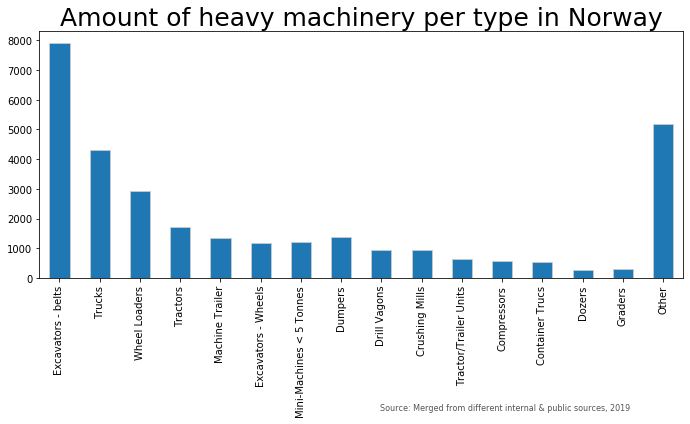

In [199]:
# Get the total number of machines that are owned in Norway

number_of_machines = owning_machines_df["Machines Total"].sum()
median_per_owner = owning_machines_df["Machines Total"].sort_values().median() ## account for skewed distribution

print("There are a total of {} machines in the data set, where the typical owner has {} machines".format(
    number_of_machines,int(median_per_owner)))
## Visualize these per category
types_df= df[['Excavators - belts', 'Trucks',
       'Wheel Loaders', 'Tractors', 'Machine Trailer', 'Excavators - Wheels',
       'Mini-Machines < 5 Tonnes', 'Dumpers', 'Drill Vagons', 'Crushing Mills',
       'Tractor/Trailer Units', 'Compressors', 'Container Trucs', 'Dozers',
       'Graders', 'Other']].sum()
create_hist_fig("",types_df,"Amount of heavy machinery per type in Norway","machine_types")

In [200]:
# Total Annual Revenue 
new_df["Revenue EUR"].sum()

10373872007

### 2. How is the market disributed over the country?

The market is naturally affected by distances when it comes to sharing machines, especially when you need them in your primary business. Hence, it is valueable to understand the density. Countries are often divided into administrative areas based on many factors, but also including what is rational boundaries in terms of business. 

The administrative areas are eg. municipalities or counties. For the use case of sharing machines we like to view the disribution over counties, and also have that visualized in a geographically. For my startup this helps segment the market, and might help identify a potential "beach head" segment. 

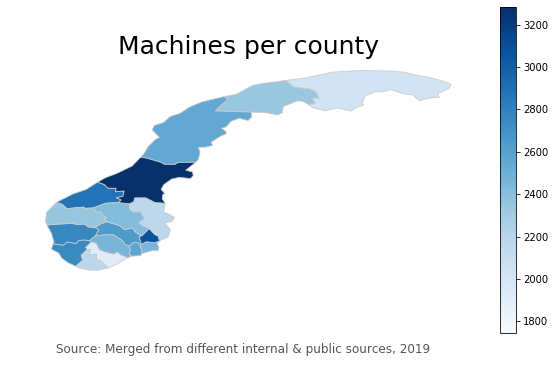

In [201]:
# Visualise the number of machines per county on a map of Norway
create_map_fig("Machines Total",merged_df,"Machines per county","machines_per_county")

We see that the most machines are owned by compabies with offices in Trøndelag county. Eventhough the machines in these companies might be used in the whole of the country, it indicates a high density of machines in this county. Plotting it in a histogram makes it a bit easier to read out the numbers for each county. 

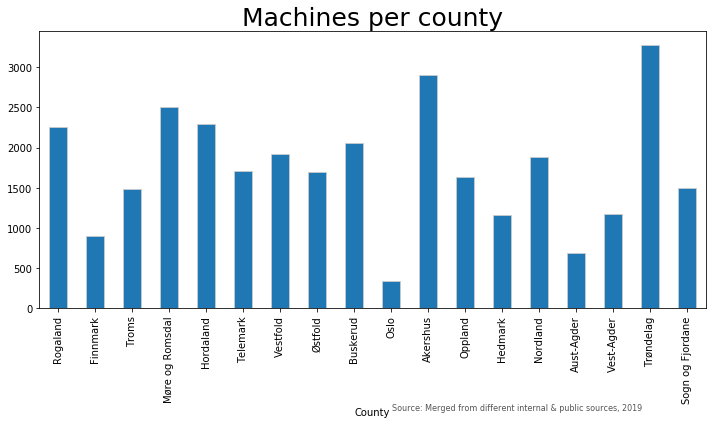

In [202]:
# Visualize the distribution of machines in a histogram
create_hist_fig("Machines Total",merged_df,"Machines per county","machines_per_county_hist")

Now it is interesting to look into how this relates to number of companies in each county, as density of machines per company is a interesting parameter for the market for peer-to-peer rental. If all machines are owned by a few companies, that could indicate that this county has a surplus of supply all other things being equal. 

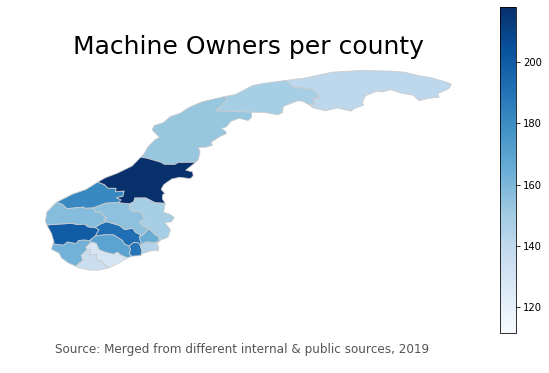

In [203]:
## Look number of machines per county
create_map_fig("Machine Owner",merged_df,"Machine Owners per county","machine_owners_per_county")

We see that overall the density og machine owners follows the density of machines, without apparent differences in this plot. We could alslo look into whether the revenue (market size) is following the same distribution. 

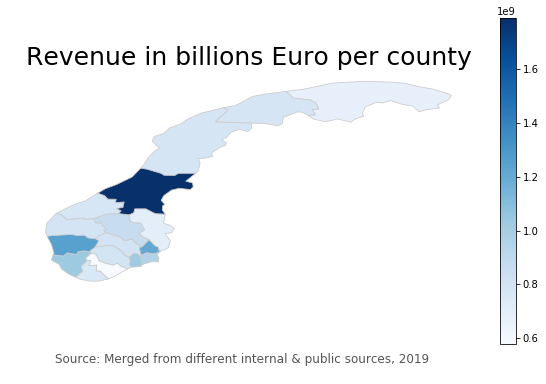

In [204]:
# Revenue Per County 
create_map_fig("Revenue EUR",merged_df,"Revenue in billions Euro per county","revenue_per_county")

We see here that the contoure differences are slightly higher, where Trøndelag seems to stand out more in terms of revenue in total generated from this county. The bar plot below 

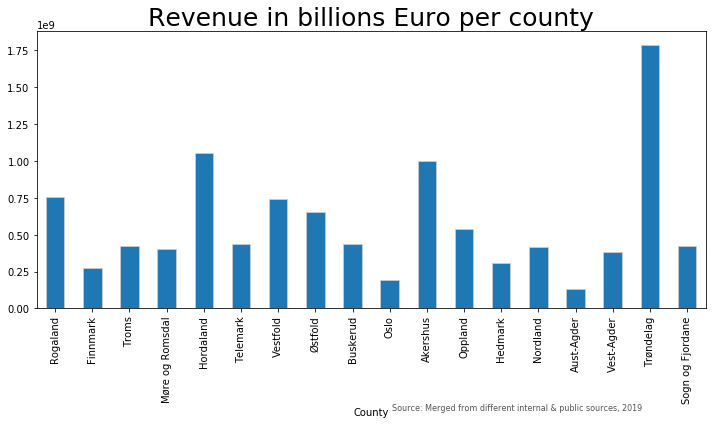

In [205]:
# Bar plot plot of revenue per county. 
create_hist_fig("Revenue EUR",merged_df,"Revenue in billions Euro per county","revenue_per_county_hist")

This might suggest that the companies with location in Trøndelag also operates outside Trøndelag, or that Trøndelag is a big market for construction relative to other counties. It is interesting to see how the revenue distributes per compaby per county, to see if companies in some counties earns more than others. 

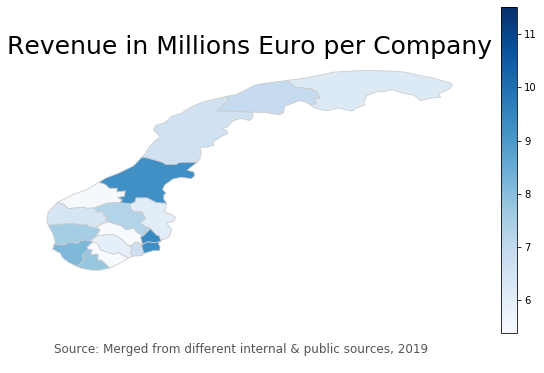

In [206]:
# What is the revenue density per county? 
create_map_fig("Revenue MEUR / Company",merged_df,"Revenue in Millions Euro per Company","revenue_per_company_per_county")

Here we see that some counties have a bigger revenue density than other. The construction industry is often said to be local, but still many companies operate with a national and even international market. The density of revenue suggest that there are bigger companies (measured in revenue) in some counties than others. Again, since revenue depends on market size it might suggest that the companies in high Revenue Density counties provides services for other counties. In the low density areas it might indicate a market with smaller companies operating in a more local market. 

This affects the incentives for collaboration and resouce sharing, as many contracts are too big for smaller companies alone and then incentivies collaboration between contractors to bid on bigger jobs. Collaboration and sharing culture certainly will affect the readiness for a peer-to-peer rental platfrom. 

### 3. What is the market potential for a machine owner, to rent out the machine while not used?

So, what are the potential for a machine owner to rent out their machines when not used? Is it something that could actually contribute significantly to their business? 

As mentioned above we have looked into rental prices per categories of machines, and found an estimated rental price per day per machine. We know that the need for machines fluctuates for these machine owners as they have variable activity throughout the year. Actually, utilization of heavy machinery is a big focus for these companies. It is big investments, that needs to be put to work to make it good investments. 

In Norway the number of working days a year is 230 and through market reports and talks with industry professionals we find that the avergage annual utilization is 40 %. This means that the machines are idle 60%. In this we assume that 30% is planned maintanance and other factors preventing rental, so we set 30% as the average percent a machine is available for rental.

With this, we want to look into the market potential in additional revenue these machine owners. 

In [207]:
# Total market potential per day in Norway for peer to peer rental of machines
print("The daily market potential for peer-to-peer rental of machines in Norway is {0:.2f} MEUR".format(
       merged_df["Total EUR/Day"].sum()/1000000))

The daily market potential for peer-to-peer rental of machines in Norway is 14.78 MEUR


This is a considerable potential for the machine owners for renting out their machines given that there is a supply as well. The actionable potential is less as the peer you rent to have to also need a machine. So given a balanced market regards to supply and demand, we could estimate a potential of half of this value. Still, it is a big potential. 

Looking further we see that the potential also has a expected distribution where it differs for the different counties. 

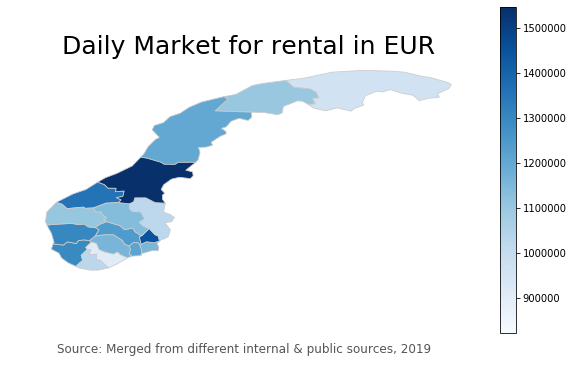

In [208]:
# Total market potential per day per county 
create_map_fig("Total EUR/Day",merged_df,"Daily Market for rental in EUR",
               "daily_rental_tot_company_per_county")

We have market prices for a subset of categories, and looking dedicated into these we see that the market for only these types of machines are considerable.

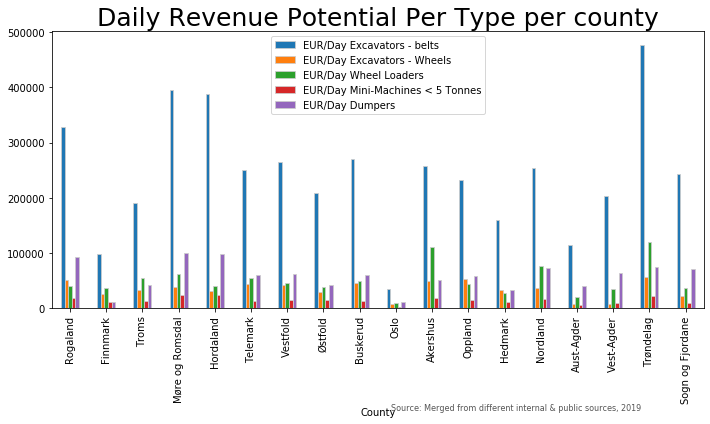

In [209]:
# Per machine types we have rental prices for 
categories = ['EUR/Day Excavators - belts', 'EUR/Day Excavators - Wheels',
       'EUR/Day Wheel Loaders', 'EUR/Day Mini-Machines < 5 Tonnes',
       'EUR/Day Dumpers']
merged_sub_df = merged_df[categories]
create_hist_fig("",merged_sub_df,"Daily Revenue Potential Per Type per county","rental_percat_per_county_hist")

The supply side here shows that Excavators - belt has the greates potential after prices and quantities in the market. It is interesting that market rental prices are high for Excavators-belt, at the same time in big supply from the Machine Owners. Often times high price indicates low supply. How will the rental prices be affected by making the excavators owned by contractors available for rental. It shows that the peer-to-peer market platform is something that will have an effect on existing market structures and business models. 

Well, these daily figures does not directly answer the question as the supply and demand in this peer-to-peer market is affected by the need you have internally as a machine owner as well as the ability to effectively supply it to the market. The annual potential accounts for the internal need for utilization, and thus indicates the real potential better. 

In [210]:
# Total "real" market potential for supply of peer-to-peer machines
print("The total annual peer-to-peer rental potential in Norway for unused machinery is {0:.2f} Billion EUR".format(merged_df['Annual Potential kEUR'].sum()/1000000))

The total annual peer-to-peer rental potential in Norway for unused machinery is 1.02 Billion EUR


In [211]:
# Average "real" margin contribution a peer to peer rental could have for machine owners per region
print("The additional revenue from rental is on average {0:.2f}% of the current revenue of the companies".
      format(merged_df["Annual Rental / Revenue EUR"].mean()*100))

The additional revenue from rental is on average 11.07% of the current revenue of the companies


This is a huge contribution to the market size measured in revenue for these operators.

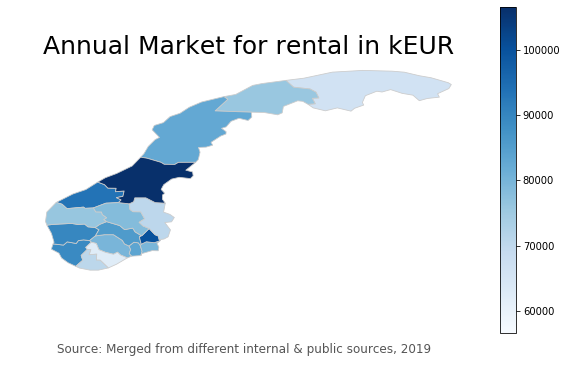

In [212]:
# Total real / annual market potential per day per county 
create_map_fig("Annual Potential kEUR",merged_df,"Annual Market for rental in kEUR",
               "Annual_rental_tot_company_per_county")

Again this shows the potential for additional revenue from supplying a peer-to-peer market place with your machines. As ecpected it follows the distribution of machines per county. The potential for revenue per machine owner is affected by the balance of supply and demand in the market they operate. As these machines are critical for the businesses, the rental period will affect the willingness to supply the market. You risk needing it yourselve in the primary business. This contributes to segment the market for this supply, where short term rental is easier to do over shorter distances. Looking at the map above we see that the potential for rental is less in the north when considering this supply side. However, it could anyways be one of the best places to start as the density of machine owners is less, smaller companies, and might be more prone to collaboration and sharing. With in the same local market it would be easier to do more flexible short term arrangement for rental, than accross country. 

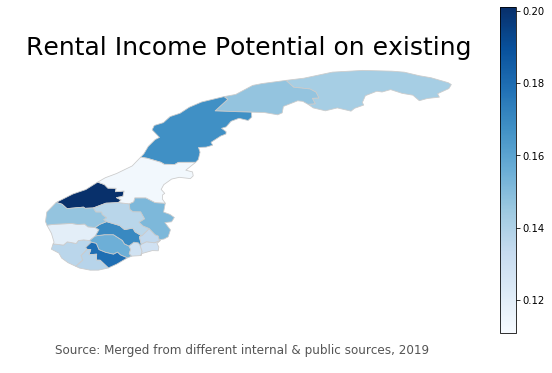

In [213]:
# Total Rental / Revenue market potential per day per county 
create_map_fig("Annual Rental / Revenue EUR",merged_df,"Rental Income Potential on existing",
               "Annual_rental_on_revenue_per_county")

## Deploy <a class="anchor" id="sixth-bullet"></a>

Deploy may mean making the code ready to deploy in a productio, however in this project it will be deplyed by publishing to github as part of the technical documentation of this project, and in a blogpost. 